# chap3. 회귀 알고리즘과 모델 규제

## k-최근접 이웃

- 분류와 회귀로 나뉘는 지도 학습 알고리즘 중, 회귀에 속한다.
- 회귀 :: 두 변수 사이의 상관관계를 분석하는 방법

### 데이터 준비

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# 데이터 받기
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

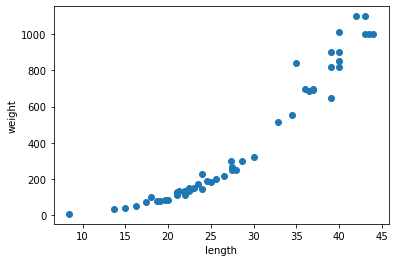

In [2]:
# 데이터의 산점도 확인

plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [3]:
# 데이터 분할
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

In [4]:
# 데이터의 모양 바꾸기
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


### 결정계수

In [5]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()

knr.fit(train_input, train_target)

KNeighborsRegressor()

In [6]:
knr.score(train_input, train_target)

0.9698823289099254

In [7]:
from sklearn.metrics import mean_absolute_error

# 타겟과 예측의 절댓값 오차를 평균하여 반환(mean_absolute_error)
test_prediction = knr.predict(test_input)

mae = mean_absolute_error(test_target, test_prediction)
mae

19.157142857142862

### 과대적합 vs 과소적합

- 과대적합: 훈련 세트에서 점수가 좋았는데 테스트 세트에서 점수가 나쁜 경우
- 과소적합: 훈련 세트보다 테스트 세트의 점수가 높거나 두 점수가 모두 너무 낮은 경우

In [8]:
knr.n_neighbors = 5

knr.score(train_input, train_target)

0.9698823289099254

In [9]:
knr.score(test_input, test_target)

0.992809406101064

In [10]:
# 새로운 참고 데이터 값으로 새로운 학습
knr.n_neighbors = 3

knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [11]:
knr.score(train_input, train_target) # 아까보다 점수가 증가

0.9804899950518966

In [12]:
knr.score(test_input, test_target) # 아까보다 감소 -> 결과적으로 비슷해 짐. 아까보다 차이가 줄었음 -> 더 나은 학습이었다.

0.9746459963987609

## 선형 회귀

### k-최근접 이웃의 한계

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [15]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state = 42)
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [16]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.n_neighbors = 3

knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [17]:
print(knr.predict([[50]]))

[1033.33333333]


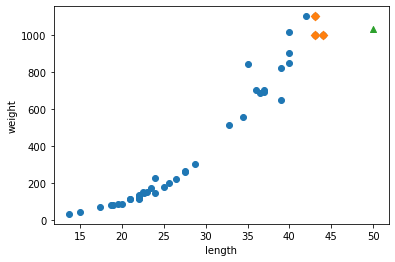

In [18]:
distances, indexes = knr.kneighbors([[50]])

plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

plt.scatter(50, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [19]:
np.mean(train_target[indexes]) 
# 여기서 문제점을 발견, 특정한 값을 예측을 할때 참고 데이터의 평균으로 값이 매겨지는데 다음과 같이 데이터의 값과 구하고자하는 데이터가 차이가 큰 경우 경향성을 무시하고 결과가 나올 수 있다.

1033.3333333333333

In [20]:
knr.predict([[100]]) # 50과 같은 결과가 나왔음, 말이 되지 않는다. -> k 최근접 회귀의 문제점

array([1033.33333333])

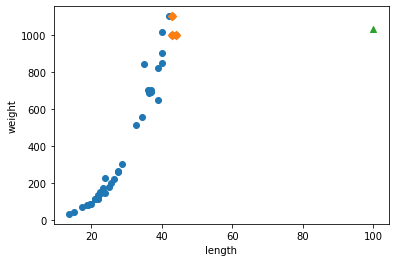

In [21]:
distances, indexes = knr.kneighbors([[100]])

plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

plt.scatter(100, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

### 선형회귀

- 특성이 하나인 경우 직선을 학습하는 알고리즘

In [22]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(train_input, train_target)

lr.predict([[50]])

array([1241.83860323])

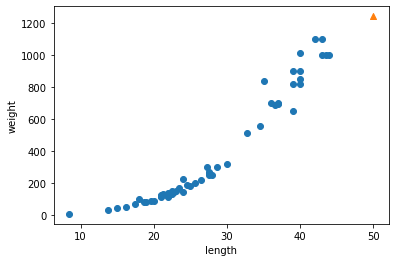

In [23]:
plt.scatter(perch_length, perch_weight)
plt.scatter(50, 1241.8, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [24]:
# lr이 찾은 기울기와 절편
print(lr.coef_, lr.intercept_)

[39.01714496] -709.018644953547


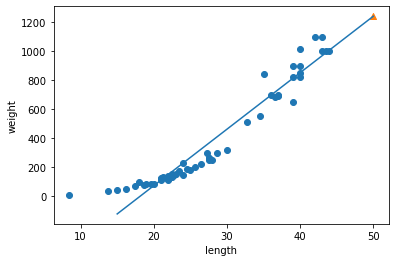

In [25]:
plt.plot([15, 50], [15*lr.coef_+lr.intercept_, 50*lr.coef_ +lr.intercept_]) # 학습된 선형 모델의 그래프
plt.scatter(perch_length, perch_weight)
plt.scatter(50, 1241.8, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [26]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target)) # 문제가 있다. 테스트 셋과 훈련 셋의 차이가 크다. -> 과대적합

0.9398463339976041
0.8247503123313562


### 다항회귀 -> 1차 그래프가 아닌 고차항으로 계산

- 길이를 x로 하고 무게를 y로 하는 이차방정식을 풀기 위해 제곱을 한 항을 새로 만들어 준다.

In [27]:
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

In [28]:
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [29]:
lr.fit(train_poly, train_target)

LinearRegression()

In [30]:
lr.predict([[50**2, 50]])

array([1573.98423528])

In [31]:
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.05021078278293


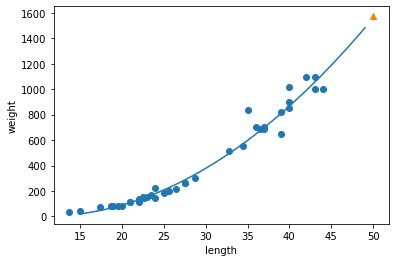

In [32]:
point = np.arange(15, 50)

plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)
plt.scatter(train_input, train_target)
plt.scatter(50, 1574, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [33]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target)) # 훨씬 더 좋아진 결과

0.9706807451768623
0.9775935108325122


## 특성 공학과 규제

### 다중 회귀

- 여러개의 특성을 사용한 선형 회귀

### 데이터 준비

In [34]:
import pandas as pd
df = pd.read_csv('http://bit.ly/perch_csv')
perch_full = df.to_numpy()
perch_full

array([[ 8.4 ,  2.11,  1.41],
       [13.7 ,  3.53,  2.  ],
       [15.  ,  3.82,  2.43],
       [16.2 ,  4.59,  2.63],
       [17.4 ,  4.59,  2.94],
       [18.  ,  5.22,  3.32],
       [18.7 ,  5.2 ,  3.12],
       [19.  ,  5.64,  3.05],
       [19.6 ,  5.14,  3.04],
       [20.  ,  5.08,  2.77],
       [21.  ,  5.69,  3.56],
       [21.  ,  5.92,  3.31],
       [21.  ,  5.69,  3.67],
       [21.3 ,  6.38,  3.53],
       [22.  ,  6.11,  3.41],
       [22.  ,  5.64,  3.52],
       [22.  ,  6.11,  3.52],
       [22.  ,  5.88,  3.52],
       [22.  ,  5.52,  4.  ],
       [22.5 ,  5.86,  3.62],
       [22.5 ,  6.79,  3.62],
       [22.7 ,  5.95,  3.63],
       [23.  ,  5.22,  3.63],
       [23.5 ,  6.28,  3.72],
       [24.  ,  7.29,  3.72],
       [24.  ,  6.38,  3.82],
       [24.6 ,  6.73,  4.17],
       [25.  ,  6.44,  3.68],
       [25.6 ,  6.56,  4.24],
       [26.5 ,  7.17,  4.14],
       [27.3 ,  8.32,  5.14],
       [27.5 ,  7.17,  4.34],
       [27.5 ,  7.05,  4.34],
       [27

In [35]:
import numpy as np
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [36]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    perch_full, perch_weight, random_state=42)

### 사이킷런 변환기

In [37]:
from sklearn.preprocessing import PolynomialFeatures # 각 특성을 제곱한 항을 추가하고 특성끼리 서로 곱한 항을 추가

In [38]:
poly = PolynomialFeatures()
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[1. 2. 3. 4. 6. 9.]]


In [39]:
poly = PolynomialFeatures(include_bias=False)
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[2. 3. 4. 6. 9.]]


In [40]:
poly = PolynomialFeatures(include_bias = False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)

(42, 9)


In [41]:
poly.get_feature_names()

['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [42]:
test_poly = poly.transform(test_input)

### 다중 회귀 모델 훈련하기

In [43]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9903183436982125


In [44]:
print(lr.score(test_poly, test_target))

0.9714559911594223


In [45]:
poly = PolynomialFeatures(degree=5, include_bias = False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

(42, 55)


In [47]:
lr.fit(train_poly, train_target)
lr.score(train_poly, train_target)

0.9999999999957028

In [48]:
lr.score(test_poly, test_target)

-144.40508211356158

### 규제

In [49]:
# 과대적합하지 않도록 만드는 것

In [50]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

### 릿지 회귀

In [51]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
ridge.score(train_scaled, train_target)

0.9896101671037343

In [52]:
ridge.score(test_scaled, test_target)

0.9790693977615393

In [53]:
import matplotlib.pyplot as plt
train_score = []
test_score = []

In [54]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    ridge = Ridge(alpha=alpha)
    ridge.fit(train_scaled, train_target)
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

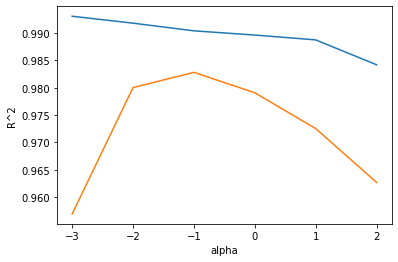

In [56]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [58]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570365
0.9827976465386882


### 라쏘 회귀

In [59]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
lasso.score(train_scaled, train_target)

0.989789897208096

In [60]:
lasso.score(test_scaled, test_target)

0.9800593698421884

In [68]:
train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(train_scaled, train_target)
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

/Users/ihoon/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18778.697957792087, tolerance: 518.2793833333334
  model = cd_fast.enet_coordinate_descent(
/Users/ihoon/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12972.821345402686, tolerance: 518.2793833333334
  model = cd_fast.enet_coordinate_descent(


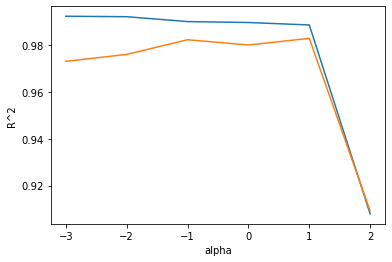

In [69]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [71]:
lasso = Lasso(alpha =10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


In [72]:
print(np.sum(lasso.coef_ == 0))

40
